In [1]:
import pandas as pd
import sklearn as sl
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set()

# import data

In [2]:
titan = pd.read_csv('./../data/titanic/train.csv')

In [3]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titan.shape

(891, 12)

In [5]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# split test /train

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_set, test_set = train_test_split(titan,test_size = 0.2,random_state = 4)

In [8]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
740,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S


In [9]:
train_set.shape

(712, 12)

In [10]:
test_set.shape

(179, 12)

# investigate data

In [11]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,570.000000,712.000000,712.000000,712.000000
mean,447.042135,0.396067,2.293539,30.020474,0.537921,0.397472,33.489560
std,257.484414,0.489423,0.843316,14.592730,1.108068,0.828904,52.752551
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,452.500000,0.000000,3.000000,28.500000,0.000000,0.000000,14.500000
75%,673.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.303125
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


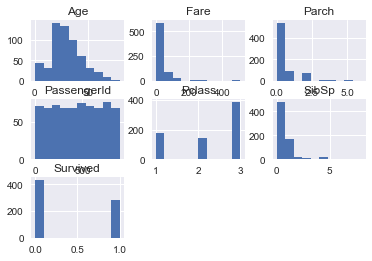

In [12]:
train_set.hist();

In [13]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            142
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          543
Embarked         2
dtype: int64

In [14]:
train_set.corr('pearson')['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.246498
Parch          0.093305
PassengerId    0.008149
SibSp         -0.040701
Age           -0.089945
Pclass        -0.322971
Name: Survived, dtype: float64

# Clean data

In [15]:
trainX = train_set.drop('Survived',axis=1)
trainY = train_set['Survived']

impuiting missing values

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

trainX_num = trainX[['Fare','Age']].copy()

imputer.fit(trainX_num)

imputer.transform(trainX_num)

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
trainX_cat = trainX['Pclass']
encoder.fit_transform(trainX_cat)

from sklearn.preprocessing import OrdinalEncoder

trainX['Pclass'].reshape(-1, 1)

encoder = OrdinalEncoder()
trainX_cat = trainX['Pclass'].values.reshape(-1,1)
encoder.fit_transform(trainX_cat)

encoder = OneHotEncoder(sparse=False,categories='auto')
trainX_cat = trainX['Pclass'].values.reshape(-1,1)
encoder.fit_transform(trainX_cat)

encoder = LabelBinarizer()
trainX_cat = trainX['Sex']
encoder.fit_transform(trainX_cat)

Using a pipeline:

In [16]:
#### a sklearn transformer class to select attributes of interest for each group
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [17]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder

In [18]:
num_attribs = ['Age','Fare']
cat_attribs = ['Pclass']
bin_attribs = ['Sex']

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHot_encoder',OneHotEncoder(sparse=False,categories='auto')),
])

bin_pipeline = Pipeline([
    ('selector',DataFrameSelector(bin_attribs)),
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('label_encoder',OrdinalEncoder()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
   ('cat_pipeline',cat_pipeline),
   ('bin_pipeline',bin_pipeline) # there is some issue with this pipeline, unsure why.
])

cat_pipeline.fit_transform(trainX)

num_pipeline.fit_transform(trainX)

In [19]:
trainXt = full_pipeline.fit_transform(trainX)

# Build basic model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_reg = LogisticRegression(solver='lbfgs')

In [23]:
log_reg.fit(trainXt,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()
dtree.fit(trainXt,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfor = RandomForestClassifier(n_estimators = 100)
rfor.fit(trainXt,trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
from sklearn.svm import SVC

In [29]:
svm = SVC(gamma='auto')
svm.fit(trainXt,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
from sklearn.linear_model import RidgeClassifier

### evaulate the models on entire traiing set

In [31]:
from sklearn.metrics import f1_score

In [32]:
log_reg_pred = log_reg.predict(trainXt)
f1_score(log_reg_pred,trainY)

0.7295825771324863

In [33]:
dtree_pred = dtree.predict(trainXt)
f1_score(dtree_pred,trainY)

0.974820143884892

In [34]:
rfor_pred = rfor.predict(trainXt)
f1_score(rfor_pred,trainY)

0.9752650176678446

In [35]:
svm_pred = svm.predict(trainXt)
f1_score(svm_pred,trainY)

0.7377938517179023

### cross validation scoring - how do models fair on the validation sets (CV)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
scores_lr = cross_val_score(log_reg,trainXt,trainY,cv=10,scoring='f1')

In [38]:
scores_dt = cross_val_score(dtree,trainXt,trainY,cv=10,scoring='f1')

In [39]:
scores_rf = cross_val_score(rfor,trainXt,trainY,cv=10,scoring='f1')

In [40]:
scores_svm = cross_val_score(svm,trainXt,trainY,cv=10,scoring='f1')

In [41]:
def disp_scores(scores_list):
    #print(scores_list)
    print('CV score: {} (STD: {})'.format(np.mean(scores_list).round(3), np.std(scores_list).round(3)))
    #print('Mean: ', )
    #print('Std: ', np.std(scores_list).round(3))

In [42]:
disp_scores(scores_lr)

CV score: 0.72 (STD: 0.044)


In [43]:
disp_scores(scores_lr)

CV score: 0.72 (STD: 0.044)


In [44]:
disp_scores(scores_dt)

CV score: 0.723 (STD: 0.06)


In [45]:
disp_scores(scores_rf)

CV score: 0.755 (STD: 0.055)


In [46]:
disp_scores(scores_svm)

CV score: 0.729 (STD: 0.049)


function for testing of models

In [47]:
svm1 = SVC(gamma='auto')
svm2 = SVC(gamma='auto',kernel='linear')
svm3 = SVC(gamma='auto',kernel='sigmoid')
svm4 = SVC(gamma='auto',kernel='poly')
ridge = RidgeClassifier(alpha=0.5)
rfor = RandomForestClassifier(n_estimators = 10)

models = [svm1,svm2,svm3,svm4,ridge,rfor]

def test_basic_model(model):
    """function to eval basic models"""
    #### print model info
    print(model)
    
    #### train and test on all data
    model.fit(trainXt,trainY)
    model_pred = model.predict(trainXt)
    print('All train:' , f1_score(model_pred,trainY).round(3) )
    
    #### cv training and testing
    scores_model = cross_val_score(model,trainXt,trainY,cv=10,scoring='f1')
    disp_scores(scores_model)
    print()
    return

for i in models:
    test_basic_model(i)
    
    
    
    
    

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.738
CV score: 0.729 (STD: 0.049)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.713
CV score: 0.713 (STD: 0.05)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
All train: 0.703
CV score: 0.694 (STD: 0.075)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=No

NOTE: random forest model score is much lower on the Validation sets than the training set - > overfitting! 

Possible solutions:
- simplify model
- constrain model (regularise it)
- get more training data

# grid seraching for best models

rforest and SVM look interesting...lets try those only.

In [48]:
from sklearn.model_selection import GridSearchCV

#### RF

In [74]:
param_grid = [
    {'n_estimators':[10,30,60,90,150],'max_features':[2,4,6]},
    {'bootstrap':[False],'n_estimators':[30,60,90,150],'max_features':[2,4,6]}
]

rfor = RandomForestClassifier()

grid_search = GridSearchCV(rfor,param_grid,cv=10,scoring='f1',return_train_score=True)

grid_search.fit(trainXt,trainY)

C:\Anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 30, 60, 90, 150], 'max_features': [2, 4, 6]}, {'bootstrap': [False], 'n_estimators': [30, 60, 90, 150], 'max_features': [2, 4, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [75]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 150}

In [76]:
cvres = grid_search.cv_results_

for mean_score,train_score,params in zip(cvres['mean_test_score'],cvres['mean_train_score'],cvres['params']):
    print("%.3f" % mean_score,"%.3f" % train_score ,  params)

0.711 0.955 {'max_features': 2, 'n_estimators': 10}
0.742 0.972 {'max_features': 2, 'n_estimators': 30}
0.748 0.975 {'max_features': 2, 'n_estimators': 60}
0.752 0.976 {'max_features': 2, 'n_estimators': 90}
0.759 0.976 {'max_features': 2, 'n_estimators': 150}
0.733 0.954 {'max_features': 4, 'n_estimators': 10}
0.755 0.971 {'max_features': 4, 'n_estimators': 30}
0.749 0.976 {'max_features': 4, 'n_estimators': 60}
0.753 0.976 {'max_features': 4, 'n_estimators': 90}
0.762 0.976 {'max_features': 4, 'n_estimators': 150}
0.741 0.949 {'max_features': 6, 'n_estimators': 10}
0.732 0.972 {'max_features': 6, 'n_estimators': 30}
0.752 0.975 {'max_features': 6, 'n_estimators': 60}
0.750 0.976 {'max_features': 6, 'n_estimators': 90}
0.747 0.976 {'max_features': 6, 'n_estimators': 150}
0.718 0.976 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
0.718 0.976 {'bootstrap': False, 'max_features': 2, 'n_estimators': 60}
0.721 0.976 {'bootstrap': False, 'max_features': 2, 'n_estimators': 90}
0

In [63]:
cvres = grid_search.cv_results_

for mean_score,train_score,params in zip(cvres['mean_test_score'],cvres['mean_train_score'],cvres['params']):
    print("%.3f" % mean_score,"%.3f" % train_score ,  params)

0.731 0.955 {'max_features': 2, 'n_estimators': 10}
0.732 0.972 {'max_features': 2, 'n_estimators': 30}
0.747 0.975 {'max_features': 2, 'n_estimators': 60}
0.764 0.976 {'max_features': 2, 'n_estimators': 90}
0.750 0.976 {'max_features': 2, 'n_estimators': 150}
0.731 0.952 {'max_features': 4, 'n_estimators': 10}
0.753 0.972 {'max_features': 4, 'n_estimators': 30}
0.746 0.976 {'max_features': 4, 'n_estimators': 60}
0.758 0.976 {'max_features': 4, 'n_estimators': 90}
0.751 0.976 {'max_features': 4, 'n_estimators': 150}
0.732 0.954 {'max_features': 6, 'n_estimators': 10}
0.742 0.972 {'max_features': 6, 'n_estimators': 30}
0.746 0.976 {'max_features': 6, 'n_estimators': 60}
0.750 0.976 {'max_features': 6, 'n_estimators': 90}
0.747 0.976 {'max_features': 6, 'n_estimators': 150}
0.719 0.976 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
0.726 0.976 {'bootstrap': False, 'max_features': 2, 'n_estimators': 60}
0.721 0.976 {'bootstrap': False, 'max_features': 2, 'n_estimators': 90}
0

In [52]:
grid_search.best_estimator_.feature_importances_

array([0.29683436, 0.34439851, 0.02312844, 0.01504165, 0.05652383,
       0.2640732 ])

In [58]:
num_attribs

['Age', 'Fare']

In [57]:
full_pipeline.get_feature_names

<bound method FeatureUnion.get_feature_names of FeatureUnion(n_jobs=None,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['Age', 'Fare'])), ('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('std_scaler', StandardScaler(copy=True, with_mean=T...verbose=0)), ('label_encoder', OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>))]))],
       transformer_weights=None)>

#### SVM

In [83]:
param_grid = [
    {'C':[1,10,80,100,150,200,500],'kernel':['poly'],'gamma':['auto']},
    #{'C':[1,10,80,100,200,500],'kernel':['rbf'],'gamma':['auto']}
]

SVM = SVC()

grid_search_SVM = GridSearchCV(SVM,param_grid,cv=10,scoring='f1',return_train_score=True)

grid_search_SVM.fit(trainXt,trainY)

C:\Anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 80, 100, 150, 200, 500], 'kernel': ['poly'], 'gamma': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [84]:
cvres = grid_search_SVM.cv_results_

for mean_score,train_score,params in zip(cvres['mean_test_score'],cvres['mean_train_score'],cvres['params']):
    print("%.3f" % mean_score,"%.3f" % train_score ,  params)

0.734 0.741 {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.744 0.749 {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
0.749 0.758 {'C': 80, 'gamma': 'auto', 'kernel': 'poly'}
0.751 0.759 {'C': 100, 'gamma': 'auto', 'kernel': 'poly'}
0.747 0.757 {'C': 150, 'gamma': 'auto', 'kernel': 'poly'}
0.743 0.755 {'C': 200, 'gamma': 'auto', 'kernel': 'poly'}
0.741 0.753 {'C': 500, 'gamma': 'auto', 'kernel': 'poly'}


In [85]:
grid_search_SVM.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# eval on test set

In [86]:
testX = test_set.drop('Survived',axis=1)
testY = test_set['Survived']

In [89]:
testXt = full_pipeline.transform(testX)

In [95]:

def eval_final_model(testY,testX,final_model):


    final_pred = final_model.predict(testX)
    print(final_model.estimator)
    print(f1_score(testY,final_pred))
    print()
    return

models = [grid_search_SVM,grid_search]

for i in models:
    eval_final_model(testY,testXt,i)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.7339449541284403

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.7652173913043478



# ROC curve

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
rfor_predCV = cross_val_predict(rfor,trainXt,trainY,cv=10)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr , thresholds = roc_curve(trainY,rfor_predCV)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)

In [ ]:
plot_roc_curve(fpr,tpr)

In [ ]:
thresholds

# Dev

In [ ]:
break

In [ ]:
train_num = train.drop()

In [ ]:
train.columns

In [ ]:
y_var = ['Survived']
x_var = ['Pclass','Embarked','Sex','SibSp','Parch']

y = train[y_var]
X = train[x_var]

In [ ]:
X.describe()

In [ ]:
X.hist()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LabelEncoder()

In [ ]:
train.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y)






print(clf.feature_importances_)

print(clf.predict([[0, 0, 0, 0]]))

In [ ]:
from sklearn.preprocessing import CategoricalEncoder
cat = CategoricalEncoder()

X = np.array([['a', 'b', 'a', 'c'], [0, 1, 0, 1]], dtype=object).T

cat.fit_transform(X).toarray()

In [ ]:
skl.preprocessing.